# TME3: introduction à Numpy

> Consignes: le fichier TME3_Sujet.ipynb est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2018/course/view.php?id=4650. Si vous êtes en binôme, renommez-le en TME3_nom1_nom2.ipynb.

## Exercice 1: 
Implémenter les exemples vu en TD. Imprimer les tableaux résultats pour vérification.

In [1]:
from PIL import Image
import numpy as np
import math as m
import matplotlib.pyplot as plt


#Exercice 1
# Q 1
tab = np.arange(0,100).reshape(10,10)
print(type(tab))
# Q 2 
tab = tab.astype('int8')
# Q 3
tab1 = tab.astype('float32')
tab2 = tab.astype('float64')
# Q 4
print("nb dimension = ",tab.ndim," taille de chaque dimension = ",np.shape(tab)," nb elements = ",np.size(tab))

# Q 5
v = np.zeros(100)

# Q 6
u = np.zeros((20,30))
# Q 7
w = np.zeros((20,30,3))
for i in range(len(w)):
    for j in range(len(w[0])):
        for k in range(len(w[0][0])):
            w[i][j][k] = 255
               
# Exercice 2

#Q 1

def moy(tab):
    somme = 0
    nb = 0
    for ligne in tab:
        for e in ligne:
            somme+=e
            nb+=1
    return somme/nb
# Q 2

x = np.linspace(-m.pi,m.pi,100)
#la taille de chaque intervalle est 2pi/100
print(x[1]-x[0],2*m.pi/100)
# Q 3
y=[]
for i in range(len(x)):
    y.append(m.sin(x[i]))
    
# Q 4
plt.plot(x,y)
plt.show()

# Q 5
X = np.linspace(-3,3,100)
Z = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        Z[i][j] = m.exp(-X[i]**2-X[j]**2)
# Q 6
Z[:,0] = 0
Z[0,:] = 0
Z[:,99] = 0
Z[99,:] = 0
Z = Z.astype('uint8')
img = Image.fromarray(Z).convert('L')
#plt.imshow(img)

# Q 7
c1 = Z[:,0]
l1=Z[0,:]
c100=Z[:,99]
l100=Z[99,:]

Z=np.zeros((100,100))
Z[:,0]=c1
Z[0,:]=l1
Z[:,99]=c100
Z[99,:]=l100

# Exercice 3

# Q 1
M = np.random.rand(10,10)
moyenne = np.sum(M)/np.size(M)
print(moyenne)

# Q 2

# Q 3
y = np.sin(x)

# Q 4
ex = [-m.exp(e)**2 for e in X]
e_x = np.array([ex])
z = np.matmul(e_x.transpose(),e_x)
# Q 5
rd = np.random.randint(0,10,size = (12,10))
nb5 = 0
for ligne in rd:
    for e in ligne:
        if e==5:
            nb5+=1
print(nb5)

<class 'numpy.ndarray'>
nb dimension =  2  taille de chaque dimension =  (10, 10)  nb elements =  100
0.06346651825433947 0.06283185307179587


<Figure size 640x480 with 1 Axes>

0.479652332538331
20


## Exercice 2: Numpy et les images

### 2.1 Normalisation
Normaliser l'image <tt>img/seiche.png</tt>. Indication: utiliser les méthodes <tt>min()</tt> et <tt>max()</tt> de la classe <tt>ndarray</tt>. Afficher l'image PIL <tt>seiche.png</tt> puis le tableau numpy normalisé. Ps: si l'image numpy apparait colorée, utiliser la fonction gray() qui fixe la palette de couleurs d'<tt>imshow()</tt> en niveaux de gris.

In [2]:
from PIL import Image
from pylab import *
import numpy as np

def normalisation(A,B,img):
    mini =min(img)
    maxi=max(img)
    return ((img-mini)*(B-A)//(maxi-mini))+A

Img=Image.open("img/seiche.png")
img=list(Img.getdata())
img=np.array(img)
tab=normalisation(0,255,img)
print(tab)
plt.figure(1)
plt.imshow(Img)
tab = tab.reshape(Img.size).astype('uint8')
Img2 = Image.fromarray(tab,'L')
plt.figure(2)
Img2.show()

FileNotFoundError: [Errno 2] No such file or directory: 'img/seiche.png'

### 2.2 Visualisation PIL et Numpy
Lire l'image <tt>img/CT-scan.png</tt> (une coupe d'une acquisition d'un scanner X d'un corps humain) avec PIL et sa classe <tt>Image</tt>. Imprimer les extremas de l'image et l'image PIL. Transformer-là en tableau Numpy. A nouveau afficher ce tableau sous forme d'image. Que constatez-vous ?

0 2244


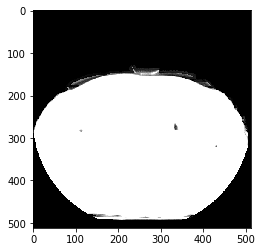

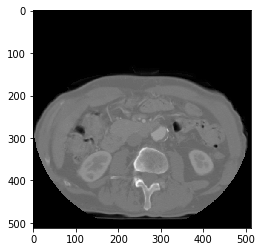

In [41]:
CT = Image.open('img/CT-scan.png')
data=list(CT.getdata())
data=np.array(data)
mini=min(data)
maxi=max(data)
print(mini,maxi)
plt.figure(1)
plt.imshow(CT)
plt.figure(2)
plt.imshow(data.reshape(CT.size))
plt.gray()
# il normalise automatiquement

### 2.3 Seuillage
Prendre le tableau numpy de la question précédente. Appliquer un seuillage haut au seuil 255. 
Remarque: cette opération se fait une instruction Python. Afficher le résultat sous forme d'image et comparer avec l'image PIL affichée à la question précédente. Qu'en déduisez vous du comportement de imshow() sur les images PIL ?

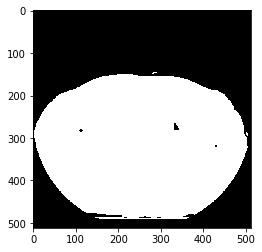

In [42]:
def seuillage(s,data):
    bi = np.zeros(len(data))
    for i in range(len(data)):
        if data[i]>s :
            bi[i] = 1
        else :
            bi[i] = 0
    return bi

bi=seuillage(255,data)
plt.imshow(bi.reshape(CT.size))
plt.gray()
#comme les deux images sont similaires , on peut en deduire que pour les pixels dont la valeur depasse 255 sont remis à 255 

### 2.4 Seuillage - suite
Sur la même image, appliquer un seuillage à 1000 et commenter la visualisation de l'image seuillée. Essayer d'autres valeurs de seuils pour différentier certains organes.


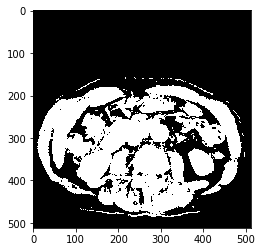

In [43]:
bi1=seuillage(1000,data)
plt.imshow(bi1.reshape(CT.size))
plt.gray()
#visualisation des contours des régions plus clairs

### 2.4 Damier
Comment fabriquer une image qui représente un damier (alternance de 6 cases blanches et 6 cases noires en ligne et en colonne), chaque case étant de taille 20 par 20. On pourra utiliser les fonctions <tt>hstack()</tt>, <tt>vstack()</tt> et <tt>tile()</tt>.

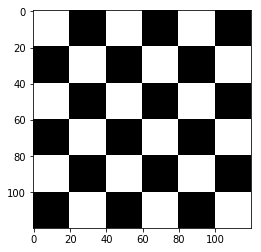

In [44]:
N=Image.new('1',(20,20),0)
B=Image.new('1',(20,20),1)
v=np.vstack((N,B))
u=np.vstack((B,N))
uv=np.hstack((u,v))
damier=np.tile(uv,(3,3))
plt.imshow(damier)

## Exercice 3: Manipulation et parcours de tableaux
### 3.1 Permutation de colonnes
Écrire un code Python qui créé un tableau <tt>A</tt> initialisé à des valeurs quelconque, ou bien une image lue sur le disque, construit un tableau <tt>B</tt> de même taille qui contient en première colonne la dernière colonne de <tt>A</tt>, et pour ses colonnes restantes, les premières colonnes de <tt>A</tt>. 


In [4]:
A=np.random.randint(-20,20,(20,20))
B=np.zeros(A.shape)
B[:,0]=A[:,19]
for i in range(1,20):
    B[:,i]=A[:,i-1]
print(A)
print(B)

[[-15   6 -11  -3 -16  -5  15   6  -4 -17  17  10  -3   2 -10   8  -8  -3
    1 -11]
 [  3 -12 -18  10  -4  12   9 -16 -14 -15  -9   1  -2 -12 -10  19  -2 -17
   19   9]
 [  4 -11  -9  15  14  -5 -18 -15  15   3  12   4  12 -16 -17  -7 -14 -11
    9  -8]
 [-18  -8   5  -5  19  10 -20  -4   8   3  -6  -3  -8  -8  -3  -3  -8 -16
    9  -9]
 [  1 -16   7   3 -18   4   2   9 -12  14  14  16  -3  -7   1   2 -16  15
   -9 -20]
 [ 10  13  -8   1   4  -8  16  -5  11 -10  -3  -6  -2  -7   0  13  -3 -12
   -1 -20]
 [ 17 -14 -18  18 -18   0   9   3  16   6 -12  -9   9  14   0  -9 -13   6
   15 -11]
 [  8  -2   1 -20   4 -18 -19  -2   5   3  14 -17   6 -13  15  16   4 -11
   -7 -17]
 [-13  -7 -11   8  -6 -11  17 -19 -19   8  -8   2   4 -12   3   0   5  10
   10  19]
 [-12  -9   3  16  -8 -14  13  -2   7  -3   0   6 -12   1  14 -10 -16  -2
    9  11]
 [-20  15  -9  12   6   7 -20   7  -7  -3 -17   0 -14  -3 -19  16  13  19
   -2   9]
 [-19   1 -10  -7   0   7  14  -7 -18   6  -1  16  17  -8  -2   9

### 3.2 Duplication de lignes et colonnes
Écrire un code Python qui prend le même tableau <tt>A</tt>, créé un tableau <tt>A2</tt> ayant 2 lignes et deux colonnes de plus que <tt>A</tt> et telque :
 - <tt>A2</tt> privé de ses premières et dernières lignes et colonnes doit valoir <tt>A</tt>. 
 - Les bords de <tt>A2</tt> doivent correspondre aux bords de <tt>A</tt>. Les valeurs aux coins de A2 ne devraient pas vous poser de problème !


In [9]:

A2=np.zeros((22,22))
A2[1:20,1:20] = A[0:19,0:19]
A2[1:20,0] = A[0:19,0]
A2[1:20,21] = A[0:19,19]
A2[0,1:20] = A[0,0:19]
A2[21,1:20] = A[19,0:19]
print(A2)
print(A)

[[  0. -15.   6. -11.  -3. -16.  -5.  15.   6.  -4. -17.  17.  10.  -3.
    2. -10.   8.  -8.  -3.   1.   0.   0.]
 [-15. -15.   6. -11.  -3. -16.  -5.  15.   6.  -4. -17.  17.  10.  -3.
    2. -10.   8.  -8.  -3.   1.   0. -11.]
 [  3.   3. -12. -18.  10.  -4.  12.   9. -16. -14. -15.  -9.   1.  -2.
  -12. -10.  19.  -2. -17.  19.   0.   9.]
 [  4.   4. -11.  -9.  15.  14.  -5. -18. -15.  15.   3.  12.   4.  12.
  -16. -17.  -7. -14. -11.   9.   0.  -8.]
 [-18. -18.  -8.   5.  -5.  19.  10. -20.  -4.   8.   3.  -6.  -3.  -8.
   -8.  -3.  -3.  -8. -16.   9.   0.  -9.]
 [  1.   1. -16.   7.   3. -18.   4.   2.   9. -12.  14.  14.  16.  -3.
   -7.   1.   2. -16.  15.  -9.   0. -20.]
 [ 10.  10.  13.  -8.   1.   4.  -8.  16.  -5.  11. -10.  -3.  -6.  -2.
   -7.   0.  13.  -3. -12.  -1.   0. -20.]
 [ 17.  17. -14. -18.  18. -18.   0.   9.   3.  16.   6. -12.  -9.   9.
   14.   0.  -9. -13.   6.  15.   0. -11.]
 [  8.   8.  -2.   1. -20.   4. -18. -19.  -2.   5.   3.  14. -17.   6.
  -13.  

### 3.3 Temps de calcul
Reprendre l'exercice 2 du TME2 en utilisant Numpy: calculer les extremas d'un tableau numpy (de grande taille, par exemple l'image <tt>../TME2/img/genies-math.jpg</tt> convertie en niveaux de gris), en parcourant par indice les valeurs du tableau. Puis utiliser les méthodes <tt>min()</tt> et <tt>max()</tt>. Chronométrer les temps grâce aux fonctions <tt>tic()</tt> et <tt>tac()</tt>. Discuter ces temps.

In [51]:
from time import process_time
from time import process_time
mytime = 0
def tic():
    global mytime
    mytime = process_time()
def tac():
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

tic()
img=Image.open("img/genies-math.jpg").convert('L')
data=list(img.getdata())
tab=np.array(data)
mini=256
maxi=0
for i in range(len(tab)):
        if tab[i]<mini :
            mini=tab[i]
        elif tab[i]>maxi:
            maxi=tab[i]
            
print(mini,maxi)
tac()

tic()
M=max(data)
m=min(data)
print(M,m)
tac()

0 255
8.3125
255 0
0.546875
